<a href="https://colab.research.google.com/github/pritul2/yolov5_FaceMask/blob/master/yolov5_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Mask with YOLOv5



### Download yolo from ultralytics repo




In [ ]:
import torch
from IPython.display import Image  # for displaying images
from utils.google_utils import gdrive_download  # for downloading models/datasets

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Download face_mask dataset created by roboflow.ai

link: https://public.roboflow.ai/object-detection/mask-wearing/1

But I will make download from my repo on github because don't need login

## Download dataset

In [ ]:
!curl -L "https://public.roboflow.ai/ds/bKCJLK7ikY?key=< >" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    689      0  0:00:01  0:00:01 --:--:--   689
100 3791k  100 3791k    0     0  2331k      0  0:00:01  0:00:01 --:--:-- 2331k
Archive:  roboflow.zip
replace test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg? [

In [ ]:
!mv /content/train/images/*.txt /content/train/labels

## Data Augmentation

In [ ]:
from PIL import Image,ImageDraw
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import imgaug.augmenters as iaa
import os
import numpy as np
from shutil import copyfile
cnt=0
def write_img(img,txt_path,add):
    global cnt
    new_txt_path =  "/content/train/labels/"+str(cnt)+ ".txt"
    new_img_path = "/content/train/images/"+str(cnt) +".jpg"
    cnt+=1
    
    '''#FOR DEBUG#
    image_original_bbox = convert_to_bbox((read_file(txt_path))[1:],img.size)
    draw_rectangle(image_original_bbox,img)
    input()'''
    
    copyfile("/content/train/labels/"+txt_path[:-4]  + ".txt", new_txt_path)
    img.save(new_img_path)


for i in os.listdir("/content/train/images"):
  if i.find('jpg')!=-1 or i.find('png')!=-1 or i.find('tif')!=-1:
    print(i)
    img = Image.open("/content/train/images/"+i)
    aug = iaa.GaussianBlur(sigma=(8.0,10.0))
    img_aug_Blur = Image.fromarray(aug.augment_image(np.array(img)))
    path = i
    write_img(img_aug_Blur,path,"blur")

    aug = iaa.Multiply(3)
    img_aug_Blur = Image.fromarray(aug.augment_image(np.array(img)))
    write_img(img_aug_Blur,path,"mul")
    

phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.jpg
r1p00017o82psp0o0or_jpg.rf.4bd9169e3618ad676e3840939a868342.jpg
1580166133-5b61094cac11561b0cbe09826e32a924_jpg.rf.7bdada2e62db2019a9a2f936083467c1.jpg
1140-travelers-at-hong-kong-airport_jpg.rf.df931ff698a201d616311ed661b6a185.jpg
r1000019q689461s9r0_jpg.rf.ae75478d4b2292f9d43a58dc102771df.jpg
1580128422_jpg.rf.182b42586c5d5ea95a75c17449c48ad3.jpg
smartmi-3pcs-filter-mask-pm25-haze-dustproof-mask-with-vent_jpg.rf.c5b0c5b7666032c5b4634740eafde234.jpg
pjecDNMmCUQmbDoJx1fdqolnfHtpsfFK8jTA2Ng0wNg_jpeg.rf.8fe47f350be6db2c10adbc41c7f55e5b.jpg
shutterstock_584407723_jpg.rf.bb5ad9ec2eb1ae4510ee88524e453043.jpg
sdsdsff_jpg.rf.09e108ae66cf64a3e852ba71cd079040.jpg
101d6660a8974050b613dd2e6bd59390_jpg.rf.d2571bc2121193beb8e9f49af8fc7170.jpg
1303078448-China-Coronavirus-Death-Toll-Hits-304_jpg.rf.353f9ffe10e6823c6c363687d88441ba.jpg
15391513324714o1n0r10n6_jpg.rf.a91fbc7be8a94ed3c48d2e4b35bd53bb.jpg
1482202839575_jpg.rf.e1a11347c2af5242298a5812

## Yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1811 (delta 6), reused 7 (delta 2), pack-reused 1794
Receiving objects: 100% (1811/1811), 5.09 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (1175/1175), done.
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 2)) (0.29.21)
     |████████████████████████████████| 14.5MB 230kB/s 
     |████████████████████████████████| 43.7MB 68kB/s 
Requirement already up-to-date: torch>=1.5.1 in /usr/local/lib/python3.6/dist-packages (from -r yolov5/requirements.txt (line 5)) (1.5.1+cu101)
     |████████████████████████████████| 11.5MB 5.8MB/s 
     |████████████████████████████████| 2.2MB 6.1MB/s 
     |████████████████████████████████| 6.8MB 611kB/s 
     |████████████████████████████████| 276kB 6.6MB/s 
Requirement already up-to-date: torchvision>=0.6 in /us

/content/yolov5


In [ ]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 500 --data '../data.yaml' --cfg ../mask_yolov5s.yaml --weights '' --name mask_yolov5s_results --nosave --cache

    54/499     2.15G    0.0579   0.09166   0.01363    0.1632        67       416: 100% 23/23 [00:09<00:00,  2.44it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.11it/s]
                 all          29         162       0.207        0.43       0.334        0.14

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    55/499     2.15G   0.05932   0.09975   0.01342    0.1725       108       416: 100% 23/23 [00:09<00:00,  2.44it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.03it/s]
                 all          29         162       0.182       0.484       0.368       0.165

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    56/499     2.15G   0.05703   0.09361   0.01273    0.1634        95       416: 100% 23/23 [00:09<00:00,  2.43it/s]
               Class      Images     Tar

In [ ]:
!zip -r /content/drive/My\ Drive/delete_this.zip /content/yolov5/runs

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/ (stored 0%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/opt.yaml (deflated 43%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/events.out.tfevents.1595439923.6bb8d9d58272.1335.0 (deflated 8%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/train_batch0.jpg (deflated 3%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/hyp.yaml (deflated 35%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/labels.png (deflated 7%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/test_batch0_pred.jpg (deflated 3%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/weights/ (stored 0%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/weights/last_mask_yolov5s_results.pt (deflated 10%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/results.png (deflated 11%)
  adding: content/yolov5/runs/exp1_mask_yolov5s_results/train_batch2.jpg (deflat

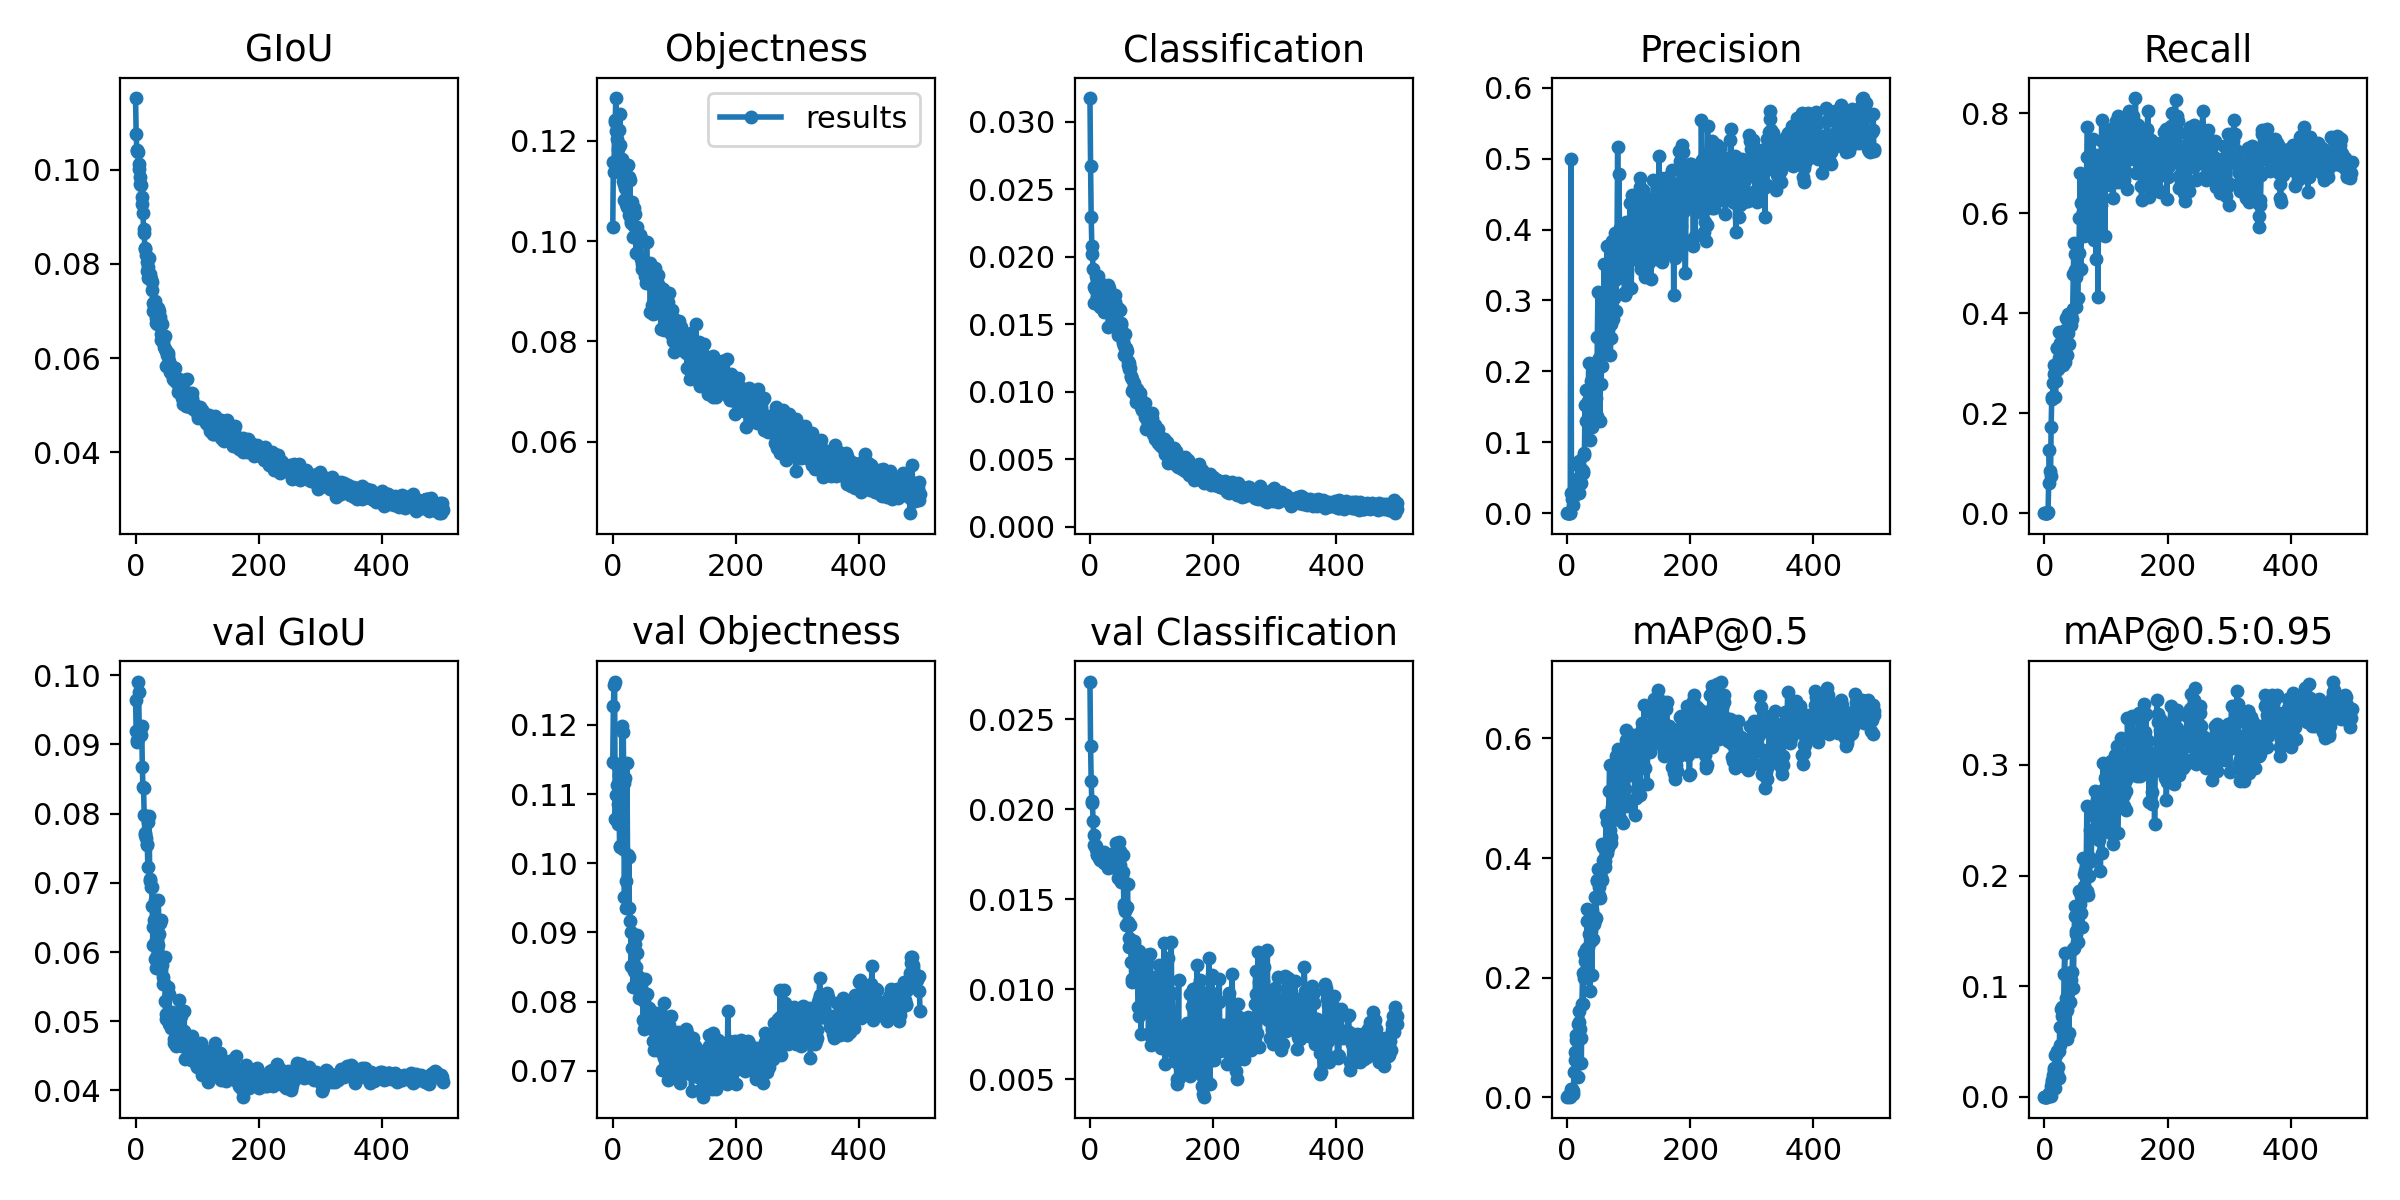

In [ ]:
from IPython.display import Image
Image('/content/content/yolov5/runs/exp1_mask_yolov5s_results/results.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/delete_this.zip

Archive:  /content/drive/My Drive/delete_this.zip
   creating: content/yolov5/runs/
   creating: content/yolov5/runs/exp1_mask_yolov5s_results/
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/opt.yaml  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/events.out.tfevents.1595439923.6bb8d9d58272.1335.0  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/train_batch0.jpg  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/hyp.yaml  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/labels.png  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/test_batch0_pred.jpg  
   creating: content/yolov5/runs/exp1_mask_yolov5s_results/weights/
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/weights/last_mask_yolov5s_results.pt  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/results.png  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_results/train_batch2.jpg  
  inflating: content/yolov5/runs/exp1_mask_yolov5s_resu

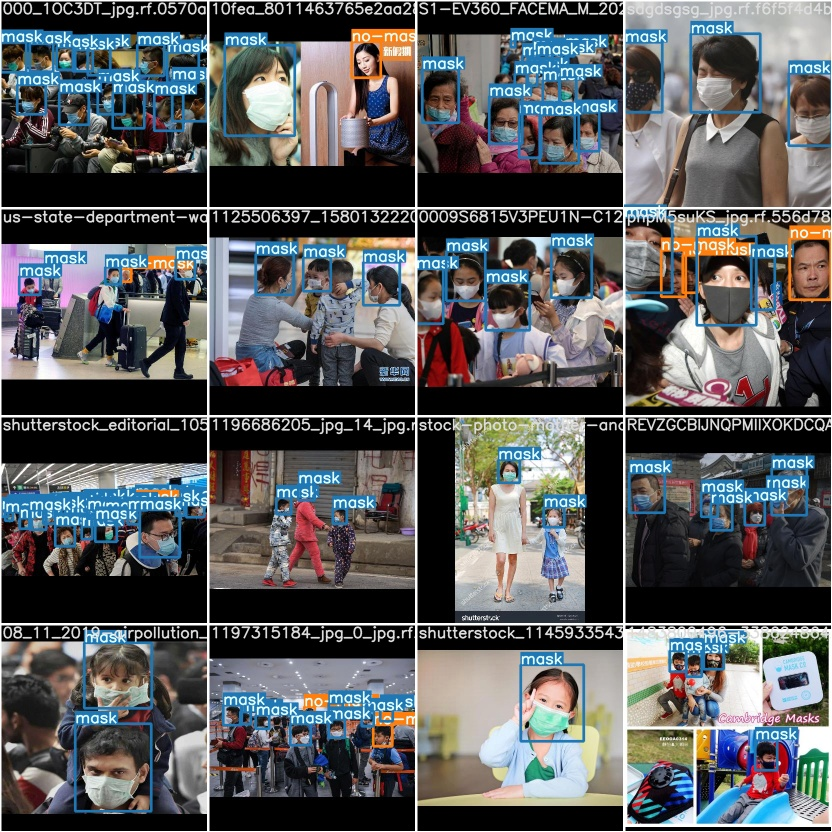

In [ ]:
Image('/content/content/yolov5/runs/exp1_mask_yolov5s_results/test_batch0_gt.jpg')

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/content/yolov5/runs/exp1_mask_yolov5s_results/weights/last_mask_yolov5s_results.pt --img 416 --conf 0.35 --source /content/yolov5/image.jpg

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/yolov5/image.jpg', update=False, view_img=False, weights=['/content/content/yolov5/runs/exp1_mask_yolov5s_results/weights/last_mask_yolov5s_results.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 140 layers, 7.24922e+06 parameters, 6.61683e+06 gradients
image 1/1 /content/yolov5/image.jpg: 288x416 2 masks, Done. (0.022s)
Results saved to /content/yolov5/inference/output
Done. (0.063s)


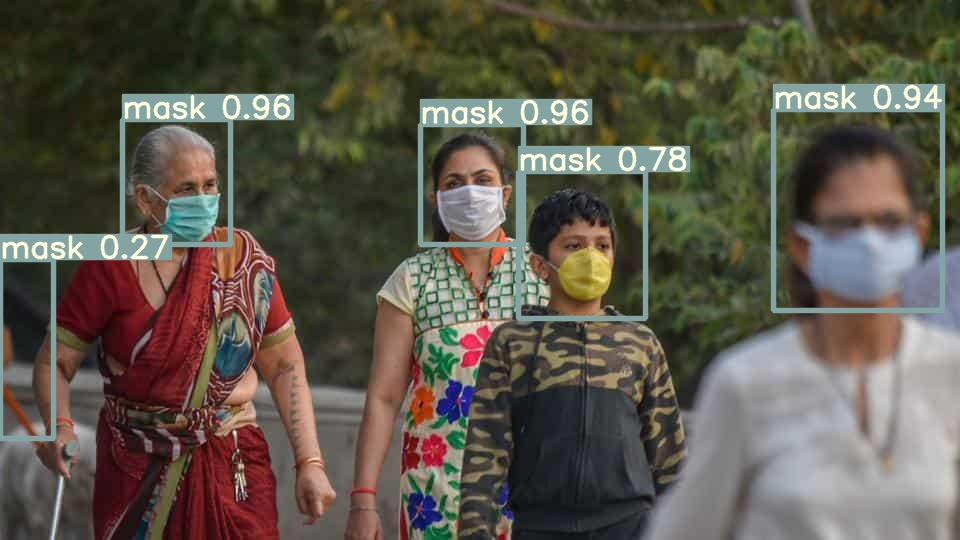

In [ ]:
Image("/content/yolov5/inference/output/covid-19_76875a76-6805-11ea-963c-5f43816952e0.jpg")